In [1]:
import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)

In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x
def expit(x):

    f_x=1/(1+np.exp(-x)) 
    return f_x

pickle_file='result_model_1_msas1_chainbreak_offset200_recycles3_1.pkl'
results=pickle.load(open(pickle_file,'rb'))
print(results['distogram'].keys())
bin_edges=results['distogram']['bin_edges']
bin_size=bin_edges[1]-bin_edges[0]
#convert the bin_edges to bin_centers
print(bin_edges)
x=bin_edges+bin_size/2
print(x)
print(bin_size)
#Add the first bin center to the begining of x to complete the conversion
first_bin=bin_edges[0]-bin_size/2
x=np.insert(x,0,first_bin)
print(bin_edges)

dict_keys(['bin_edges', 'logits'])
[ 2.3125     2.625      2.9375     3.25       3.5625     3.875
  4.1875     4.5        4.8125     5.125      5.4375     5.75
  6.0625     6.375      6.6875     6.9999995  7.3125     7.625
  7.9375     8.25       8.5625     8.875      9.1875     9.5
  9.812499  10.124999  10.4375    10.75      11.0625    11.375
 11.687499  12.        12.3125    12.625     12.9375    13.25
 13.5625    13.874999  14.187501  14.499999  14.812499  15.124999
 15.437499  15.75      16.0625    16.375     16.687502  16.999998
 17.312498  17.624998  17.937498  18.25      18.5625    18.875
 19.1875    19.5       19.8125    20.125     20.437498  20.75
 21.062498  21.374998  21.6875   ]
[ 2.46875    2.78125    3.09375    3.40625    3.71875    4.03125
  4.34375    4.65625    4.96875    5.28125    5.59375    5.90625
  6.21875    6.53125    6.84375    7.1562495  7.46875    7.78125
  8.09375    8.40625    8.71875    9.03125    9.34375    9.65625
  9.968749  10.281249  10.59375   10.90

(193, 193, 64)
64


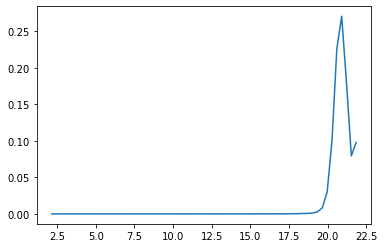

array([[20.90625   ,  0.27047604]], dtype=float32)

In [35]:
distogram=results['distogram']['logits']
print(results['distogram']['logits'].shape)
print(len(x))
#Took a random position that I know was in contact just to get something
pos1=5
pos2=28
y=distogram[pos1-1][pos2-1]
#the distogram are logits and need to be converted to probablity using softmax
#
prob=softmax(y)
#prob2=expit(y)
#print(y)
#print(prob)
plt.plot(x,prob)
#plt.plot(x,prob2)
#plt.plot(x,y_S)
plt.show()
(maxima,minima)=peakdet(prob,0.03,x)
maxima

In [51]:
#Example Search for all maximas
N=distogram.shape[0] #this is the length of the pdb

for i in range(N):
    for j in range(N):
        if j<=i: #skipping symmetric pairs
            continue
        prob=softmax(distogram[i][j])
        #prob=expit(distogram[i][j])
        (maxima,minima)=peakdet(prob,0.03,x)
        n=len(maxima)
        if(n >1):
            print(f'Found {n} maxima for pair {i+1},{j+1}: {maxima.flatten().tolist()}')
        #print(len(maxima))
            print(maxima.shape)